<a href="https://colab.research.google.com/github/peiyulin0520/KPMG-virtual-intern-tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#upload data
from google.colab import files
uploaded = files.upload()

Saving KPMG_VI_New_raw_data_update_final.xlsx to KPMG_VI_New_raw_data_update_final.xlsx


In [2]:
#load data
Transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =1, header = 1)
NewCustomerList = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =2, header = 1)
CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =3, header = 1)
CustomerAddress = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =4, header = 1)

<ipython-input-2-c1b227bbac12>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  NewCustomerList = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =2, header = 1)
<ipython-input-2-c1b227bbac12>:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =3, header = 1)


---
Task2: get data insight by Data Exploration, Model Development and Interpretation.
---
The datasets provided inlcude Transactions, CustomerDemographic, CustomerAddress, and NewCustomerList.


# Data Exploration

In [11]:
# merge three of the datasets firstly: use inner join because the purpose is to target customers, who would make a purchase
all_data = Transactions.merge(CustomerDemographic, how='inner', on='customer_id').merge(CustomerAddress, how='inner', on='customer_id')

In [12]:
all_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5


In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int64         
 1   product_id                           19968 non-null  int64         
 2   customer_id                          19968 non-null  int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  float64       
 5   order_status                         19968 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

From the overview, we can conclude that some customer_id in Transactions are not in CustomerDemographic or CustomerAddress, so the number of data jump from 20,000 to 19,968. The following step is data preprocessing.
1. Handle missing values
2. Handle unreasonable data
3. Change data type: online_order (bool), online_status (bool), deceased_indicator (bool), owns_car (bool), and postcode (str)
4. Add additional variables: Age, number of transactions, profit for each transaction, sum profit gain from each customer

number of unique data 
 transaction_id             197
product_id                   1
customer_id                192
transaction_date           154
online_order                 2
order_status                 2
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                 196
standard_cost                0
product_first_sold_date      0
dtype: int64
product_id is:  [0]


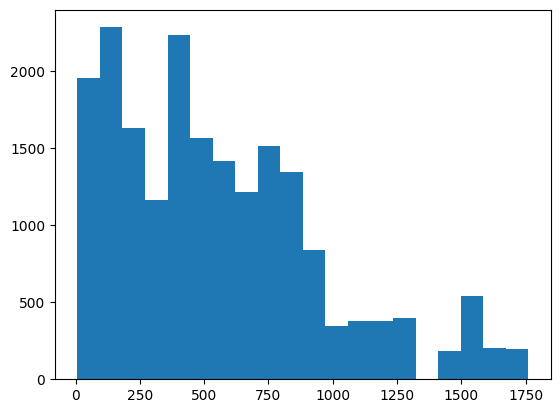

In [72]:
# data preprocessing - handle missing data
## online_order variable: not important for getting new targeted customers

##brand; product_line; product_class; product_size and product_first_sold_date 
## have same amount of missing data
### get the data, which is NaN in these columns
miss_df = Transactions[Transactions[['brand', 'product_line', 'product_class',\
                                     'product_size', \
                                     'standard_cost',\
                                     'product_first_sold_date']].\
                       isna().any(axis=1)]
print('number of unique data','\n',miss_df.nunique())
print('product_id is: ', miss_df['product_id'].unique())

##standard_cost
### data distribution by plot
plt.hist(all_data['standard_cost'], bins=20)
plt.show()
all_data['standard_cost'].agg(['min', 'max'])

## DOB: used for Age calculation
### use the datetime package and check the datetime now
from datetime import datetime
now = datetime.now()
### calculate the age
all_data['age'] = (now - all_data['DOB']).astype('<m8[Y]')

## job_title and job_industry_category
### fill NaN data with 'Unknown'
all_data['job_industry_category'] = all_data['job_industry_category'].fillna('Unknown')
all_data['job_title'] = all_data['job_title'].fillna('Unknown')

## remove rows that have missing values
all_data_clean = all_data.drop(columns=['online_order','brand', 'product_line', \
                                         'product_class', 'product_size',\
                                         'product_first_sold_date',\
                                         'last_name', 'DOB', 'default'])
all_data_clean = all_data_clean.dropna(subset=['standard_cost','age', 'tenure'])

Missing values:
1. online_order: not an important feature when identified new target customers
2. brand; product_line; product_class; product_size; product_first_sold_date: they all belong to product_id=0, and not useful to identify new target customers
3. standard_cost: they all belong to product_id=0; important to calculated the profit for each transaction, The data distribution is not normal distribtion in the plot and range from 7 to 1,759, I decide to remove NaN data directly to avoid misleading
4. last_name : not an important feature for data clustering
5. DOB: not an important feature but keep for a calculation of Age variable; remove NaN value to avoid misleading clustering result
6. job_title: Fill NaN with 'Unknown' category
7. job_industry_category: Fill NaN with 'Unknown' category
8. default: not heloful because it does not contain meaningful text or data
9. tenure: remove missing value to avoid misleading clustering result

Approved     19160
Cancelled      175
Name: order_status, dtype: int64
[179.0, 91.0, 87.0, 82.0, 79.0, 69.0, 68.0, 67.0, 66.0, 65.0, 64.0]


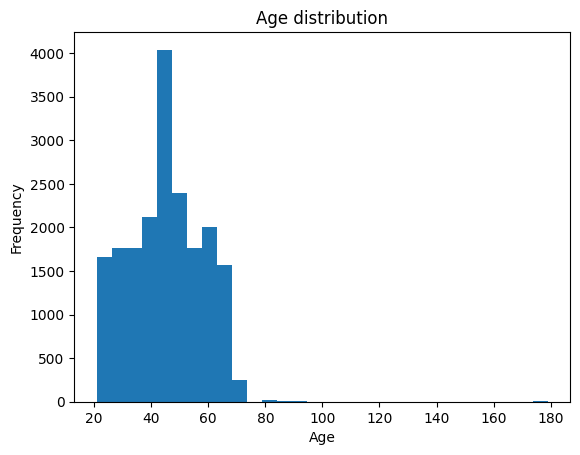

Gender categories:  ['Male' 'Female' 'F' 'M' 'U' 'Femal']
wealth_segment:  ['Mass Customer' 'Affluent Customer' 'High Net Worth']
deceased_indicator:  ['N' 'Y']
owns_car:  ['Yes' 'No']
state:  ['VIC' 'NSW' 'QLD' 'Victoria' 'New South Wales']
country:  ['Australia']


In [73]:
# Data Preprocessing - handle unreasonable data
## check order status
print(all_data_clean['order_status'].value_counts()) # includes 'Approved' 'Cancelled'

## check age
age_cust = sorted(all_data_clean['age'].unique(), reverse=True)
print(age_cust[0:11])
plt.hist(all_data_clean['age'], bins=30)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## check the uniqueness for these columns
print('Gender categories: ', all_data_clean['gender'].unique())
print('wealth_segment: ', all_data_clean['wealth_segment'].unique())
print('deceased_indicator: ', all_data_clean['deceased_indicator'].unique())
print('owns_car: ', all_data_clean['owns_car'].unique())
print('state: ', all_data_clean['state'].unique())
print('country: ', all_data_clean['country'].unique())

## Modify value to make each value representative and in the uniform format
all_data_clean['gender'].replace(['Male', 'Female', 'Femal'], ['M', 'F', 'F'], inplace=True)
all_data_clean['state'].replace(['Victoria', 'New South Wales'], ['VIC', 'NSW'], inplace=True)

##address
all_data_clean['address'].nunique() #3,411 unique address

## drop rows that are unreasonable
all_data_clean = all_data_clean.drop(all_data_clean[(all_data_clean['age']>100)|\
                                      (all_data_clean['order_status'] == 'Cancelled')].index)
all_data_clean = all_data_clean.drop(columns=['country', 'address'])

Unreasonable data:
1. order_status: shouldn't consider transactions that are cancelled
2. age: it is unreasonable that the customers would older than 100 when we assumed that the lifespan is 100.
3. gender and state: have different categories for the same definition
4. address: 3,411 unique addresses. The address is too many for data clustering
5. country: each customer comes from Australia, so it is not useful to include country for clustering or analysis

In [67]:
# all_data_clean = all_data_clean.astype({})

3409

In [71]:
all_data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19152 entries, 0 to 19967
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19152 non-null  int64         
 1   product_id                           19152 non-null  int64         
 2   customer_id                          19152 non-null  int64         
 3   transaction_date                     19152 non-null  datetime64[ns]
 4   order_status                         19152 non-null  object        
 5   list_price                           19152 non-null  float64       
 6   standard_cost                        19152 non-null  float64       
 7   first_name                           19152 non-null  object        
 8   gender                               19152 non-null  object        
 9   past_3_years_bike_related_purchases  19152 non-null  int64         
 10  job_title 

In [ ]:
## change data type
all_data = all_data.astype({'online_order':'bool', 'deceased_indicator':'bool',\
                            'owns_car':'bool','order_status':'bool',\
                            'postcode':'str'})

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20510 entries, 0 to 20509
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  float64       
 1   product_id                           20000 non-null  float64       
 2   customer_id                          20510 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         20510 non-null  bool          
 5   order_status                         20510 non-null  bool          
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price